# Setup

In [1]:
!pip install opencv-python                      # install opencv

In [2]:
import cv2                                      # for image operations
import matplotlib.pyplot as plt                 # for visualisation
import numpy as np                              # for numerical operations
from google.colab.patches import cv2_imshow     # for displaying images on colab

In [3]:
# define the path to the image folder

image_folder = "/content/drive/MyDrive/EE417/Labs/images"

# Helpers

In [4]:
def plot_side_by_side(img_1, img_2, title1="Original Image", title2="Processed Image"):
    """
    A function to plot two images side by side.
    """
    if len(img_1.shape) == 3 or len(img_2.shape) == 3:
        img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
        img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(img_1, cmap='gray')
    axs[1].imshow(img_2, cmap='gray')

    axs[0].set_title(title1)
    axs[1].set_title(title2)

# 1. Convolution Operation

The convolution operation consists of sliding a kernel across the width and height of an array and computing the sum of products of the corresponding intensities and weights.

![image](https://github.com/seccily/yoga-analyzer/assets/52993055/f18f6227-4c63-404e-b36e-9b170788ca24)


`cv2.filter2D(src, ddepth, kernel)`

* **src:** The source image on which to apply the fitler. It is a matrix that represents the image in pixel intensity values.
* **ddepth:** It is the desirable depth of destination image. Value -1 represents that the resulting image will have same depth as the source image.
* **kernel:** kernel is the filter matrix applied on the image.

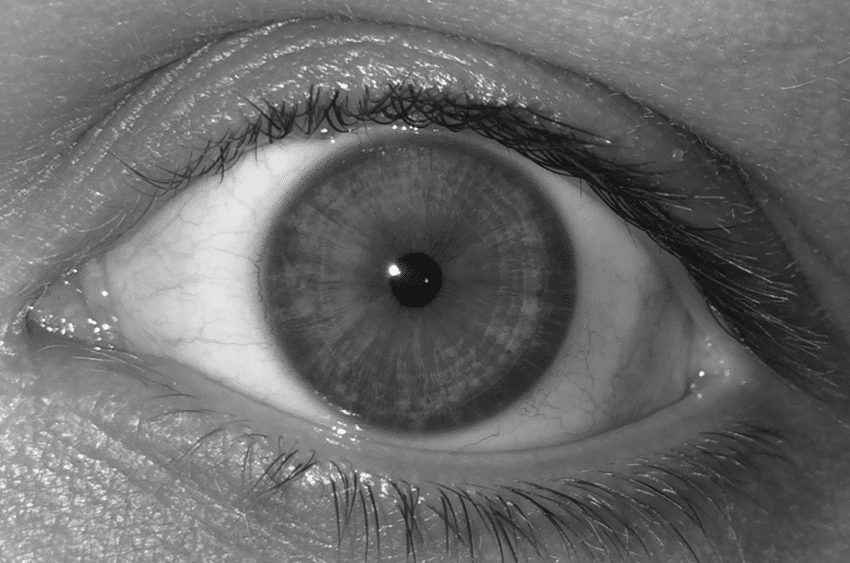

In [ ]:
img_path = f"{image_folder}/convolution.png"

img = cv2.imread(img_path, 0)

cv2_imshow(img)

## Mean Filter

Mean filtering aids in eliminating random variations or noise present in an image, all while retaining its essential features.

![image](https://github.com/seccily/yoga-analyzer/assets/52993055/8b855f7d-ee42-4e92-978b-4b8ff1d80c07)


In [ ]:
mean_kernel = 1/9 * np.ones((3, 3), np.float32)
mean_kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

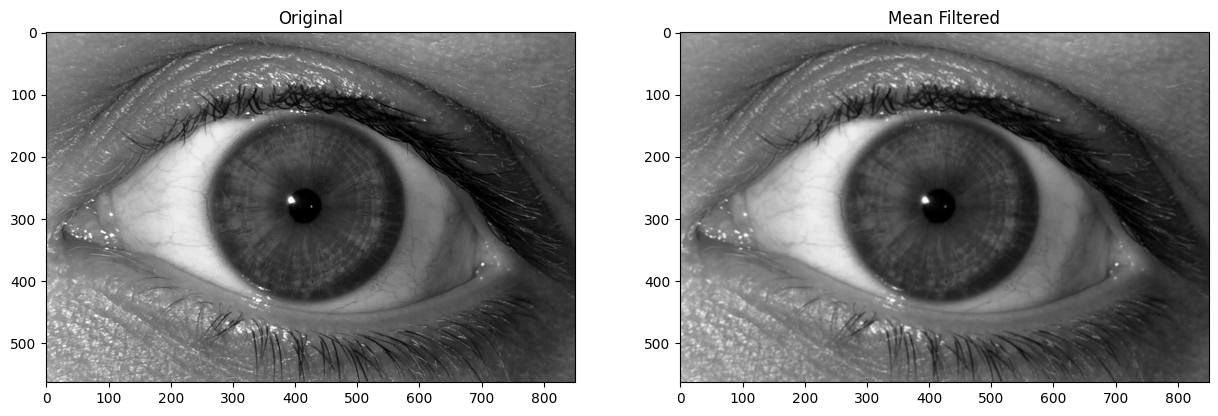

In [ ]:
mean_filtered = cv2.filter2D(img, -1, mean_kernel)

plot_side_by_side(img, mean_filtered, "Original", "Mean Filtered")

## Gaussian Filter

By applying a Gaussian kernel, the filter gives central pixels more weight than surrounding regions, effectively reducing noise while preserving image structure.

![image](https://github.com/seccily/yoga-analyzer/assets/52993055/e721db22-7807-4084-bef0-2b398fe0e8b3)

In [ ]:
gaussian_kernel = 1/16 * np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
gaussian_kernel

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

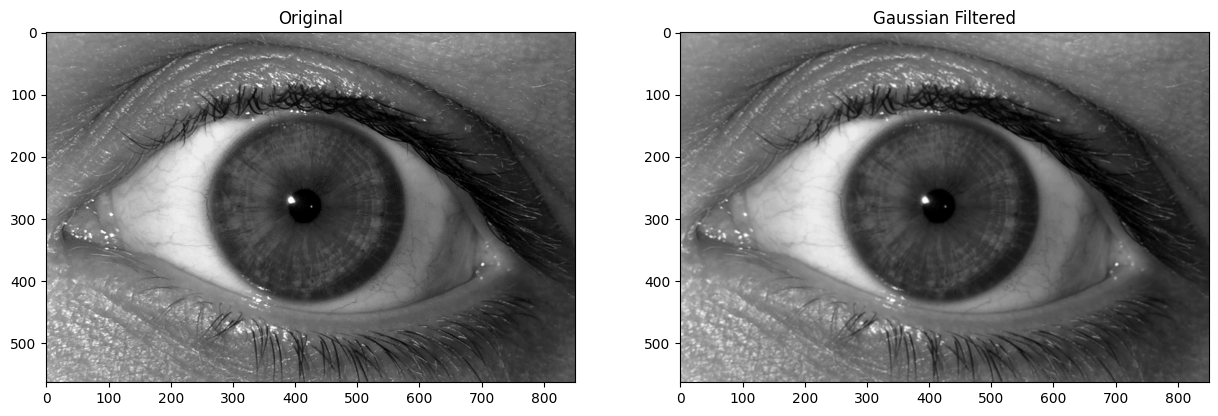

In [ ]:
gaussian_filtered = cv2.filter2D(img, -1, gaussian_kernel)

plot_side_by_side(img, gaussian_filtered, "Original", "Gaussian Filtered")

## Sobel Filter

Primary purpose of sobel filter is to detect edges within images, playing a foundational role in various edge detection algorithms. By enhancing image edges, the Sobel filter significantly contributes to tasks such as object detection, image segmentation, and edge enhancement.

![image](https://github.com/seccily/yoga-analyzer/assets/52993055/0a52f783-4c79-49ee-bbf9-99a34e678551)



### Horizontal vs Vertical

The Horizontal Sobel Kernel excels at identifying vertical edges, whereas the Vertical Sobel Kernel adeptly highlights horizontal edges.

In [ ]:
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # horizontal sobel kernel
sobel_kernel_x

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [ ]:
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) # vertical sobel kernel
sobel_kernel_y

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

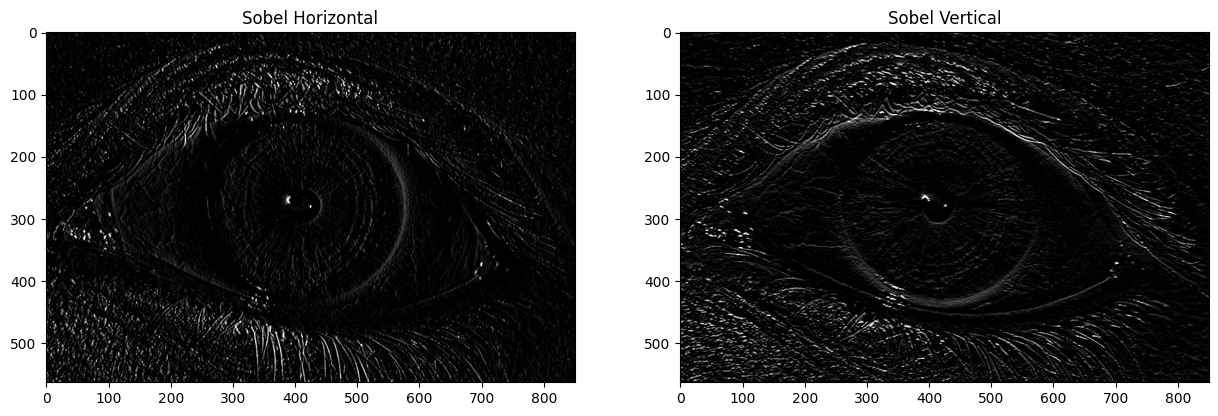

In [ ]:
sobel_horizontal_filtered = cv2.filter2D(img, -1, sobel_kernel_x)
sobel_vertical_filtered = cv2.filter2D(img, -1, sobel_kernel_y)

plot_side_by_side(sobel_horizontal_filtered, sobel_vertical_filtered, "Sobel Horizontal", "Sobel Vertical")

### Implementing Sobel Filter

> Note: `cv2.CV_64F` specifies the depth of the output image. cv2.CV_64F indicates a 64-bit floating-point output. Sobel operations often result in gradients that may have negative values or values outside the range [0, 255], so using a floating-point representation can preserve these details.



These kernels are designed to respond maximally to edges running vertically and horizontally relative to the pixel grid, one kernel for each of the two perpendicular orientations. The kernels can be applied separately to the input image, to produce separate measurements of the gradient component in each orientation (call these Gx and Gy). These can then be combined together to find the absolute magnitude of the gradient at each point and the orientation of that gradient.  

The gradient magnitude is given by:

$|G| = \sqrt{Gx^2 + Gy^2}$


> *Reference:* [Sobel Edge Detector](https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm)

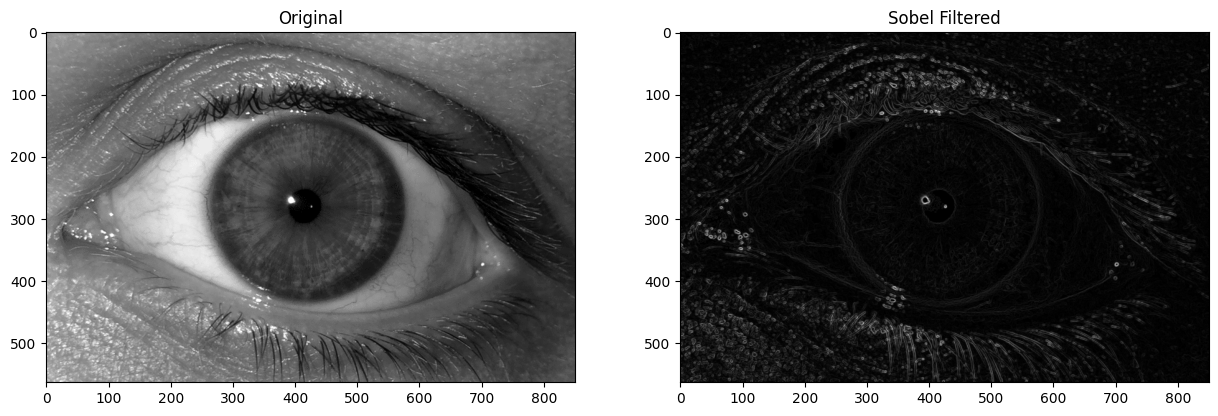

In [ ]:
sobel_x = cv2.filter2D(img, cv2.CV_64F, sobel_kernel_x)                                             # apply convolution with horizontal sobel filter
sobel_y = cv2.filter2D(img, cv2.CV_64F, sobel_kernel_y)                                             # apply convolution with vertical sobel filter

gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)                                               # calculate gradient magnitude

sobel_filtered = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)        # normalize the gradient magnitude to the range [0, 255]

plot_side_by_side(img, sobel_filtered, "Original", "Sobel Filtered")

#### With `cv2.Sobel()`

`cv2.Sobel(src, ddepth, dx, dy[, ksize[, scale[, delta[, borderType]]]]])`

* `src`: An object of the class Mat representing the source (input) image.
* `ddepth`: An integer variable representing the depth of the image (-1)
* `dx`: An integer variable representing the x-derivative. (0 or 1)
* `dy`: An integer variable representing the y-derivative. (0 or 1)


`cv2.normalize()` function is used to normalize the values of an array or an image.


* `None`: This parameter specifies the output image or array. Since None is provided, it means the normalization will be applied to the input image itself.

* `0`: This is the lower bound of the normalization range. In this case, it is set to 0.

* `255`: This is the upper bound of the normalization range. In this case, it is set to 255, which corresponds to the maximum intensity value for an 8-bit unsigned integer image.

* `cv2.NORM_MINMAX`: This parameter specifies the normalization type. It indicates that the normalization is done by scaling and shifting the input values so that they lie within the specified range.

* `cv2.CV_8U`: This parameter specifies the data type of the output image. In this case, it specifies that the output image should have 8-bit unsigned integer (uint8) data type.

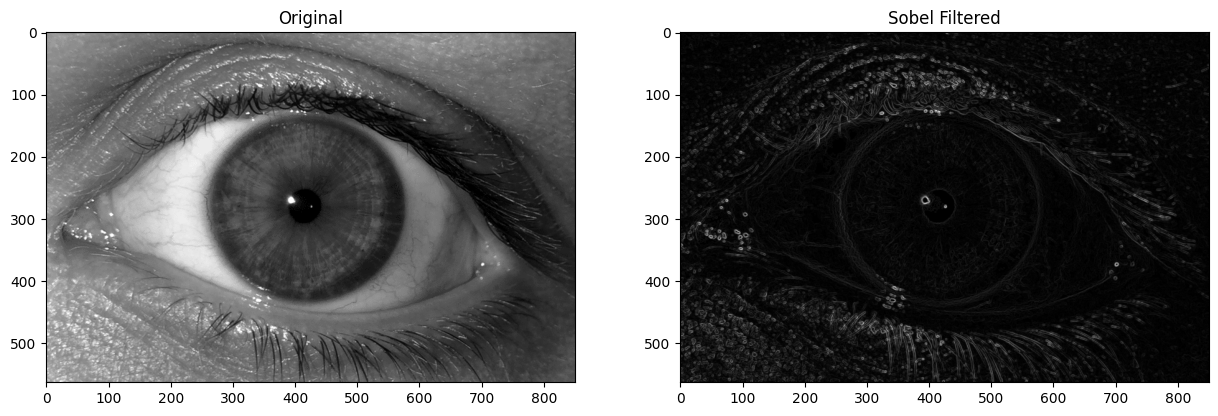

In [ ]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)                                         # horizontal sobel filter
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)                                         # vertical sobel filter

sobel_combined = cv2.magnitude(sobel_x, sobel_y)                                            # calculate gradient magnitude
sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)    # normalize the gradient magnitude to the range [0, 255]

plot_side_by_side(img, sobel_combined, "Original", "Sobel Filtered")

## Laplacian Filter

![image](https://github.com/seccily/yoga-analyzer/assets/52993055/7a010a45-588d-4e49-8dd8-a3148592b686)


In [6]:
# define the laplacian filter

laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
laplacian_kernel

array([[ 0, -1,  0],
       [-1,  4, -1],
       [ 0, -1,  0]])

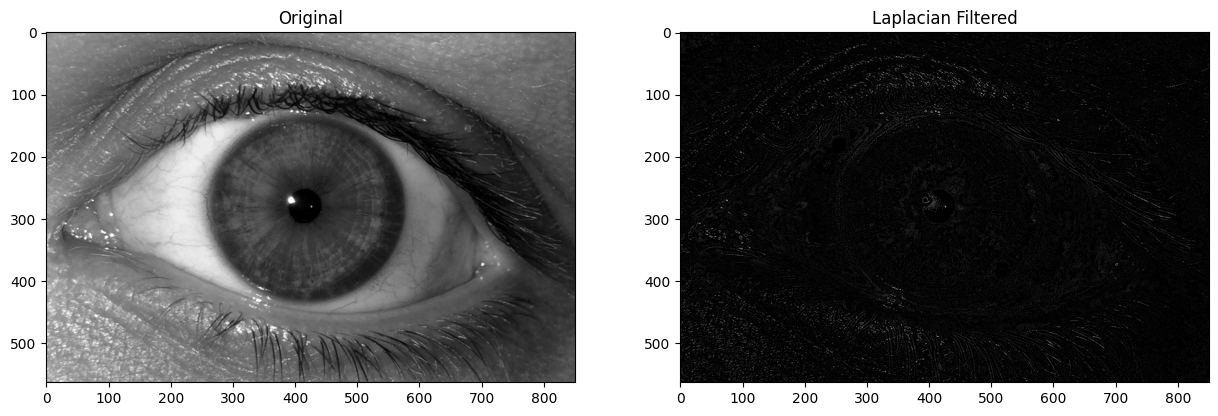

In [7]:
# apply convolution

laplacian_filtered = cv2.filter2D(img, -1, laplacian_kernel)

plot_side_by_side(img, laplacian_filtered, "Original", "Laplacian Filtered")

## Laplacian of Gaussian (LoG)

![image](https://github.com/seccily/yoga-analyzer/assets/52993055/e75d5c85-1a9c-4514-a768-102bbafc2fce)


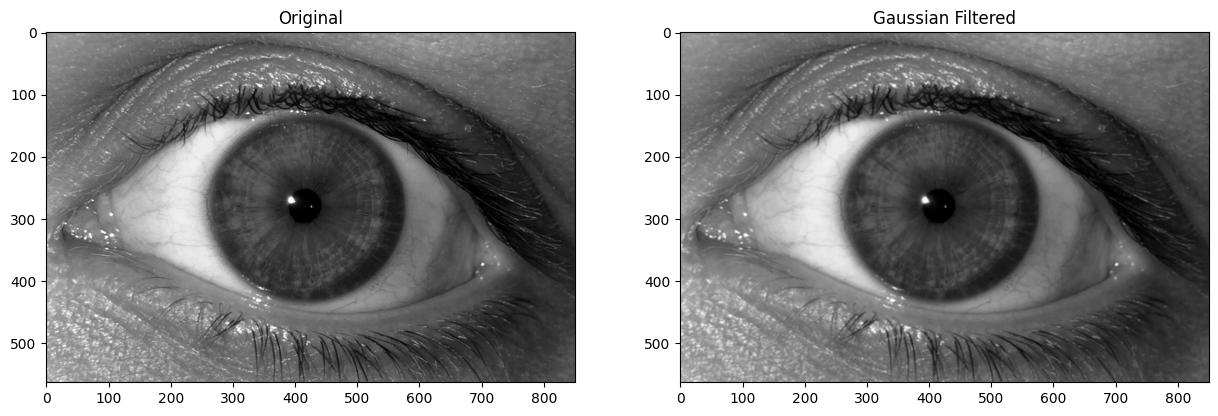

In [8]:
# apply gaussian blur first

gaussian_image = cv2.GaussianBlur(img, (3, 3), 0)

plot_side_by_side(img, gaussian_image, "Original", "Gaussian Filtered")

> Note:  `0` specifies the standard deviation of the Gaussian kernel along the x-axis and y-axis. A standard deviation of 0 implies that the standard deviation will be calculated based on the kernel size

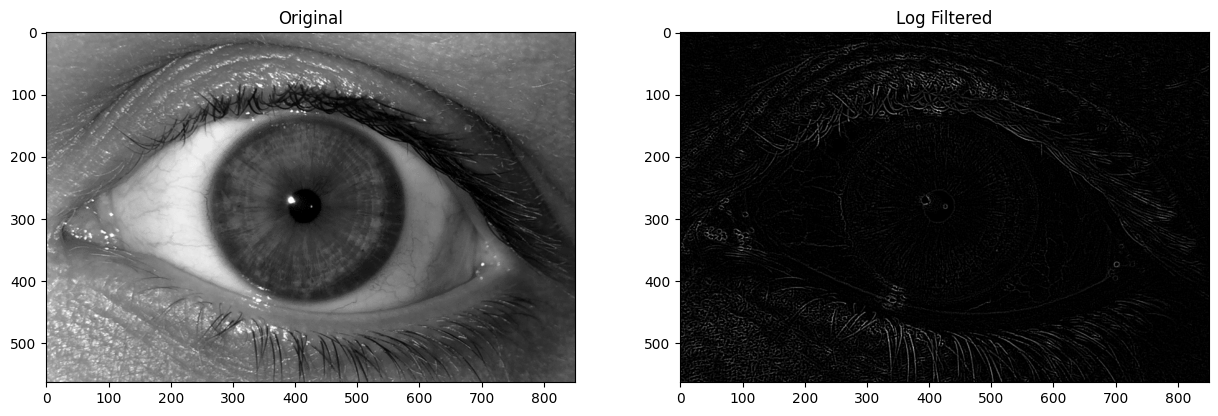

In [9]:
# apply laplacian filter to the gaussian blurred image

log_filtered  = cv2.Laplacian(gaussian_image, -1, ksize=3)

plot_side_by_side(img, log_filtered, "Original", "Log Filtered")

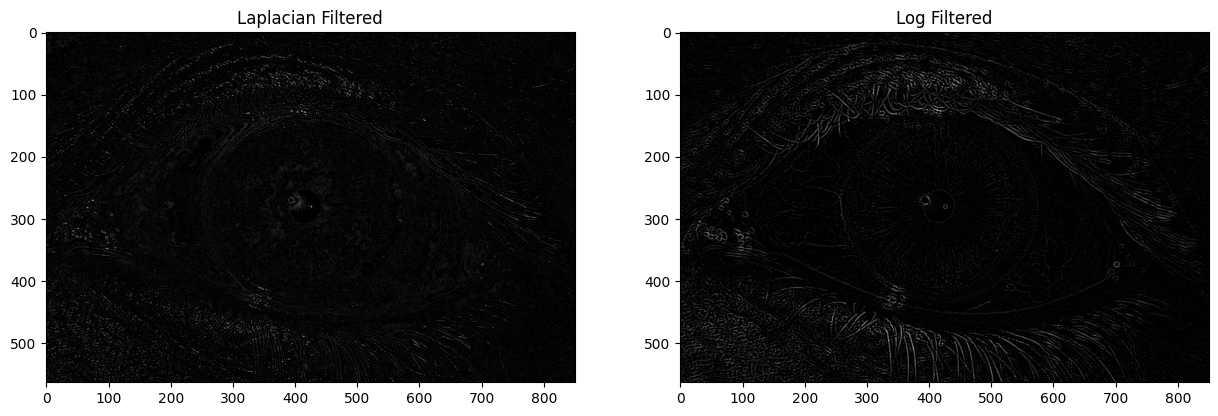

In [10]:
# let's see the difference between laplacian and laplacian of gaussian filters

plot_side_by_side(laplacian_filtered, log_filtered, "Laplacian Filtered", "Log Filtered")

## ***Exercise 1.1*** - Implement the Mean Filter of size 3x3 without using `cv2` or other equivalent libraries. Apply padding to the image to handle borders.

P.S. You can use `np.mean()` function to calculate the mean value of the window.

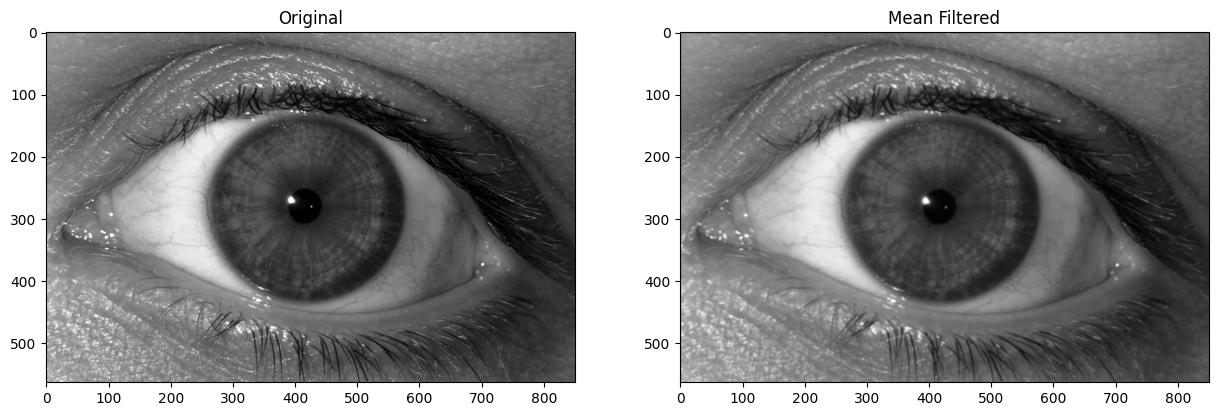

In [11]:
kernel_size = 3

height, width = img.shape

pad_width = int(kernel_size - 1 / 2)                                            # the padding width for each side
padded_image = np.zeros((height + pad_width * 2, width + pad_width * 2))        # create an empty padded image
padded_image[pad_width:-pad_width, pad_width:-pad_width] = img                  # copy the original image into the padded image

filtered_image = np.zeros_like(img)                                             # create an empty image to store the filtered result

for y in range(height):
    for x in range(width):
        window = padded_image[y:y + kernel_size, x:x + kernel_size]              # extract the local window centered at the current pixel
        filtered_image[y, x] = np.mean(window)                                   # calculate the mean value of the window and assign it to the corresponding pixel in the filtered image

plot_side_by_side(img, filtered_image, "Original", "Mean Filtered")

## ***Exercise 1.2*** - Implement the Mean Filter of size 3x3 without using `cv2` or other equivalent libraries. Apply convolution operation with mean kernel instead of using `np.mean()` function. Do not forget to apply padding to the image to handle borders.

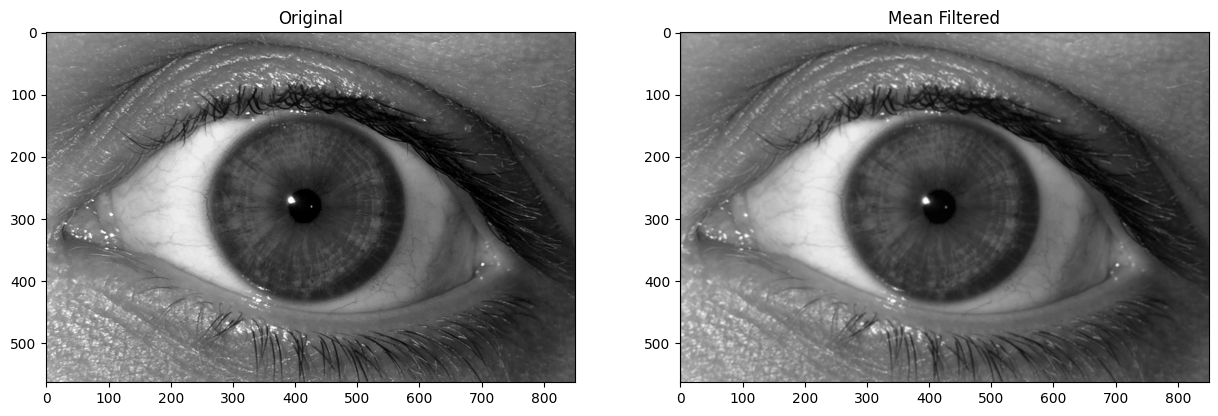

In [12]:
kernel_size = 3

kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
# kernel = 1/9 * np.ones((3, 3), np.float32)

kernel = np.flipud(np.fliplr(kernel))                                           # flip the kernel

height, width = img.shape

pad_width = int(kernel_size - 1 / 2)                                            # the padding width for each side
padded_image = np.zeros((height + pad_width * 2, width + pad_width * 2))        # create an empty padded image
padded_image[pad_width:-pad_width, pad_width:-pad_width] = img                  # copy the original image into the padded image

filtered_image = np.zeros_like(img)                                             # create an empty image to store the filtered result

for x in range(width):
    for y in range(height):
        filtered_image[y, x] = (kernel * padded_image[y: y+3, x: x+3]).sum()

plot_side_by_side(img, filtered_image, "Original", "Mean Filtered")

## Why do we need to flip the kernel before applying convolution?

When performing the convolution, you want the kernel to be flipped with respect to the axis along which you're performing the convolution because if you don't, you end up computing a correlation of a signal with itself.

When the kernel is flipped, the minus sign in the formula accounts for the reverse direction of the displacement relative to the current position in the input image. So, while the positive values of `i` and `j` correspond to moving the kernel to the right and down from the current position, the negative values of `i` and `j` correspond to moving the kernel to the left and up, respectively.

![image](https://github.com/d2l-ai/d2l-en/assets/52993055/7d56985a-88ba-4e2f-be39-15ddde5a2901)



![image](https://github.com/d2l-ai/d2l-en/assets/52993055/514db4a0-fa73-4ae8-b982-61833db3c364)
